In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Dataset/Air_Traffic_Cargo_Statistics.csv")
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
30503,201905,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Deplaned,Mail,Passenger,251951,114.285
19275,201404,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Passenger,140069,63.535
16491,201211,JetBlue Airways,B6,JetBlue Airways,B6,Domestic,US,Deplaned,Cargo,Passenger,2613,1.185
3967,200703,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Enplaned,Cargo,Passenger,545,0.247
17020,201302,Southern Air,9S,Southern Air,9S,International,Asia,Deplaned,Cargo,Freighter,1712274,776.687


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35599 entries, 0 to 35598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              35599 non-null  int64  
 1   Operating Airline            35599 non-null  object 
 2   Operating Airline IATA Code  35545 non-null  object 
 3   Published Airline            35599 non-null  object 
 4   Published Airline IATA Code  35545 non-null  object 
 5   GEO Summary                  35599 non-null  object 
 6   GEO Region                   35599 non-null  object 
 7   Activity Type Code           35599 non-null  object 
 8   Cargo Type Code              35599 non-null  object 
 9   Cargo Aircraft Type          35599 non-null  object 
 10  Cargo Weight LBS             35599 non-null  int64  
 11  Cargo Metric TONS            35599 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.3+ MB


In [4]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Weight LBS                0
Cargo Metric TONS               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
titlefont = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

lablefont = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

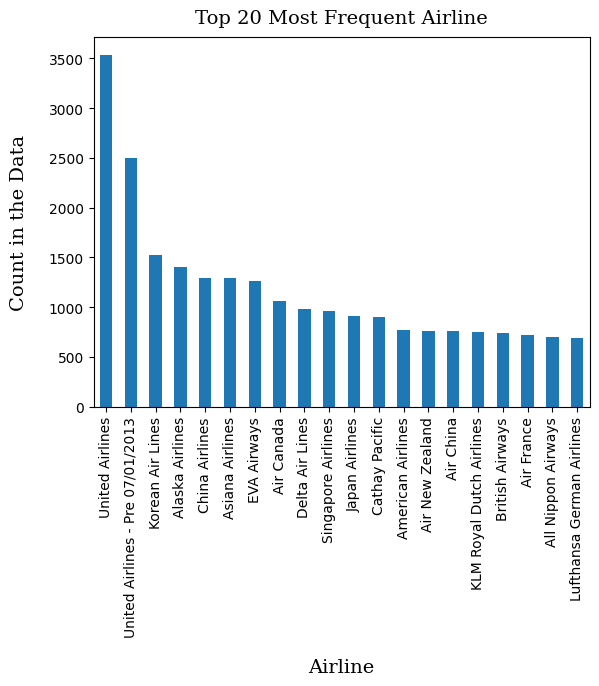

In [7]:
import matplotlib.pyplot as plt
df['Operating Airline'].value_counts().sort_values(ascending= False)[:20].plot(kind= "bar")
plt.title("Top 20 Most Frequent Airline" , fontdict= lablefont , pad = 10)
plt.xlabel("Airline" , fontdict= lablefont , labelpad= 15)
plt.ylabel("Count in the Data" , fontdict=lablefont ,  labelpad=15)
plt.grid(False)

In [8]:
# Total Unique Airlines in the data
df['Operating Airline'].value_counts().count()

97

<Axes: >

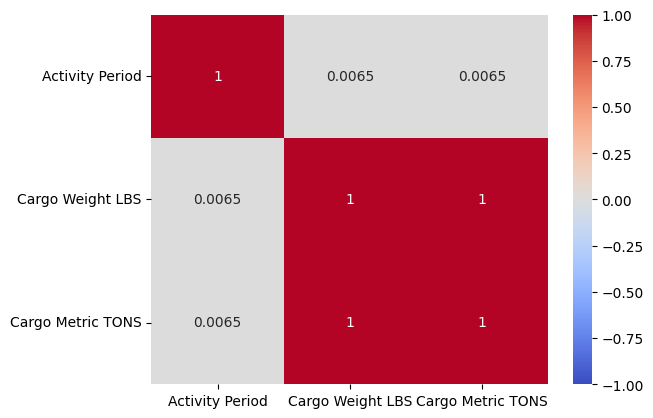

In [9]:
# df['Cargo Metric TONS'] and df['Cargo Weight LBS'] are same 
import seaborn as sns
heat_map = df.select_dtypes("number").corr()
sns.heatmap(heat_map, vmax=1 , vmin= -1 , cmap= "coolwarm" , annot= True)

<Axes: >

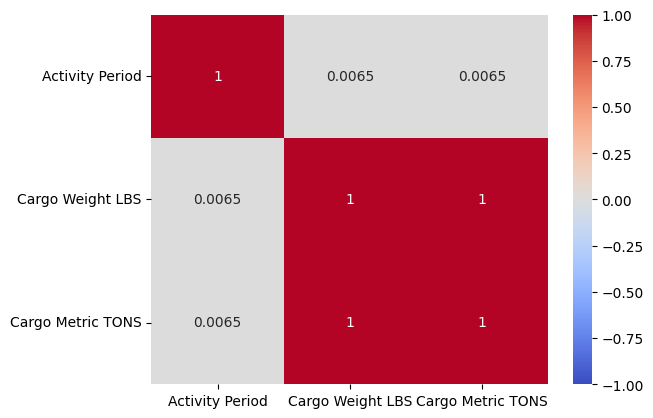

In [10]:
import seaborn as sns
heat_map = df.select_dtypes("number").corr()
sns.heatmap(heat_map , vmin= -1 , vmax= 1 , annot= True , cmap= "coolwarm")

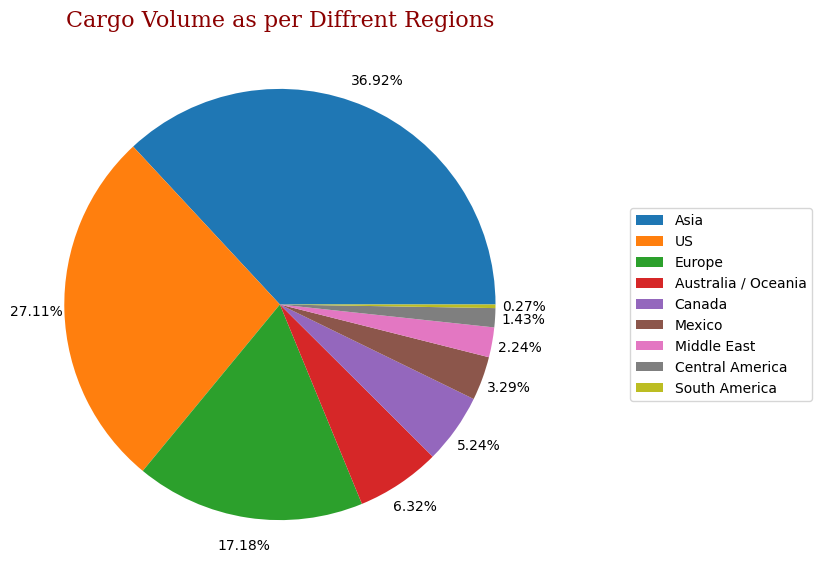

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15 ,7))
plt.title("Cargo Volume as per Diffrent Regions" , fontdict= titlefont , loc = "center")
df['GEO Region'].value_counts()
plt.pie(df['GEO Region'].value_counts() , autopct="%.2f%%" , pctdistance= 1.13,  labeldistance=1.25)
plt.legend(df["GEO Region"].value_counts().index , bbox_to_anchor = (1.5, 0.5) , loc = "center right")
plt.show()

In [12]:
df.describe()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS
count,35599.000000,3.559900e+04,35599.000000
mean,201311.369449,4.799115e+05,217.687856
std,473.480500,9.509778e+05,431.363548
min,200507.000000,1.000000e+00,0.000000
25%,200905.000000,1.839650e+04,8.344500
50%,201307.000000,1.329570e+05,60.309000
75%,201709.000000,5.469705e+05,248.106000
max,202109.000000,2.381234e+07,10801.278000


In [13]:
# How many planes as zero cargo and why
zero_cargo = df[df['Cargo Metric TONS'] == 0.0]
zero_cargo.count()

Activity Period                32
Operating Airline              32
Operating Airline IATA Code    32
Published Airline              32
Published Airline IATA Code    32
GEO Summary                    32
GEO Region                     32
Activity Type Code             32
Cargo Type Code                32
Cargo Aircraft Type            32
Cargo Weight LBS               32
Cargo Metric TONS              32
dtype: int64

In [14]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
21786,201506,United Airlines,UA,United Airlines,UA,International,Australia / Oceania,Enplaned,Express,Passenger,48,0.022
28519,201807,Air France,AF,Air France,AF,International,Europe,Enplaned,Cargo,Passenger,567521,257.428
17480,201305,Federal Express,FX,Federal Express,FX,Domestic,US,Enplaned,Cargo,Freighter,993460,450.633
34259,202102,China Airlines,CI,China Airlines,CI,International,Asia,Enplaned,Cargo,Passenger,628514,285.094
16447,201211,British Airways,BA,British Airways,BA,International,Europe,Enplaned,Cargo,Passenger,1170246,530.824


In [15]:
# 1. Is Operating Airline and Published Airline the same thing? --> Nope
df[df['Operating Airline'] != df['Published Airline']]['Activity Period'].count()

963

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

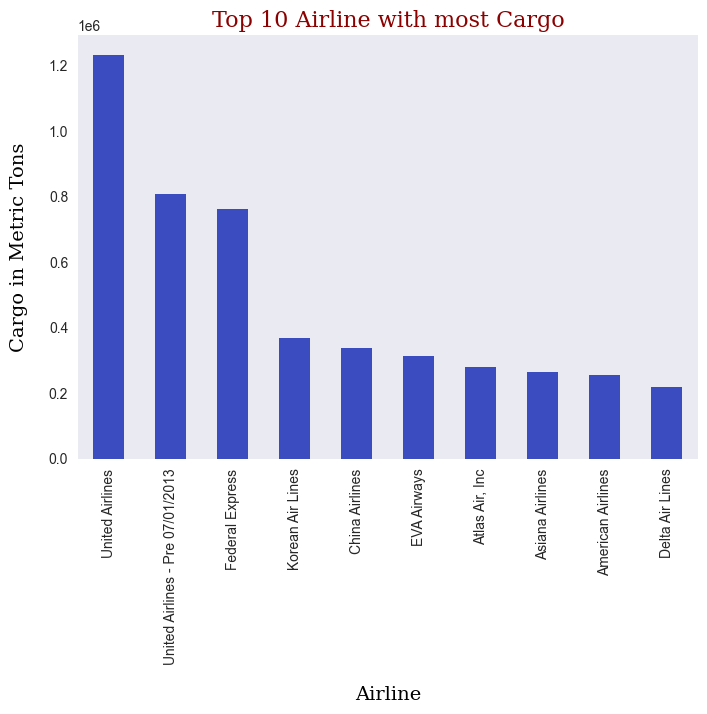

In [17]:
# 2. Which airline has handled the most cargo metric tons overall?
plt.style.use("seaborn-v0_8")
df.groupby("Operating Airline")["Cargo Metric TONS"].sum().sort_values(ascending= False)[:10].plot(kind= "bar" , colormap="coolwarm")
plt.title("Top 10 Airline with most Cargo" , fontdict= titlefont)
plt.ylabel("Cargo in Metric Tons" , labelpad= 15 , fontdict= lablefont)
plt.xlabel("Airline" ,  fontdict= lablefont , labelpad=15)
plt.grid(False)
plt.show()

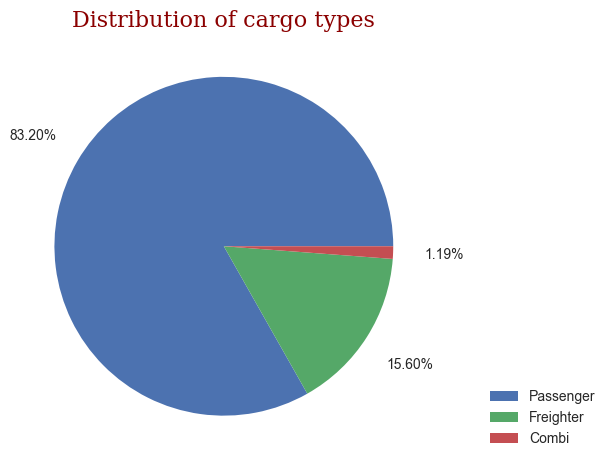

In [18]:
# 3. What is the distribution of cargo types (Express, Mail, Cargo)?
cargo_type = df['Cargo Aircraft Type'].value_counts()
plt.pie(cargo_type , autopct= "%.2f%%", pctdistance=1.3)
plt.legend(cargo_type.index, loc = "lower left", bbox_to_anchor = (1.1 , 0))
plt.title("Distribution of cargo types" , fontdict= titlefont , loc= "center")
plt.show()

In [19]:
df.sample()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
166,200507,US Airways,US,US Airways,US,Domestic,US,Enplaned,Mail,Passenger,323412,146.7


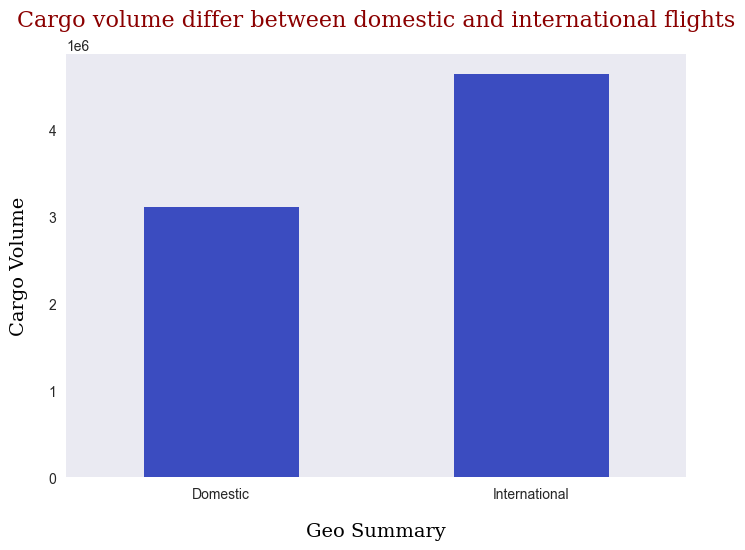

In [20]:
# 4. How does cargo volume differ between domestic and international flights?
df.groupby("GEO Summary")['Cargo Metric TONS'].sum().plot(kind= "bar" , colormap= "coolwarm")
plt.title("Cargo volume differ between domestic and international flights", fontdict= titlefont , pad= 20)
plt.ylabel("Cargo Volume" , labelpad= 15 , fontdict= lablefont)
plt.xticks(rotation = 0)
plt.xlabel("Geo Summary" , labelpad= 15 , fontdict= lablefont)
plt.grid(False)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35599 entries, 0 to 35598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              35599 non-null  int64  
 1   Operating Airline            35599 non-null  object 
 2   Operating Airline IATA Code  35545 non-null  object 
 3   Published Airline            35599 non-null  object 
 4   Published Airline IATA Code  35545 non-null  object 
 5   GEO Summary                  35599 non-null  object 
 6   GEO Region                   35599 non-null  object 
 7   Activity Type Code           35599 non-null  object 
 8   Cargo Type Code              35599 non-null  object 
 9   Cargo Aircraft Type          35599 non-null  object 
 10  Cargo Weight LBS             35599 non-null  int64  
 11  Cargo Metric TONS            35599 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.3+ MB


Text(0.5, 0, 'Cargo Metric TONS')

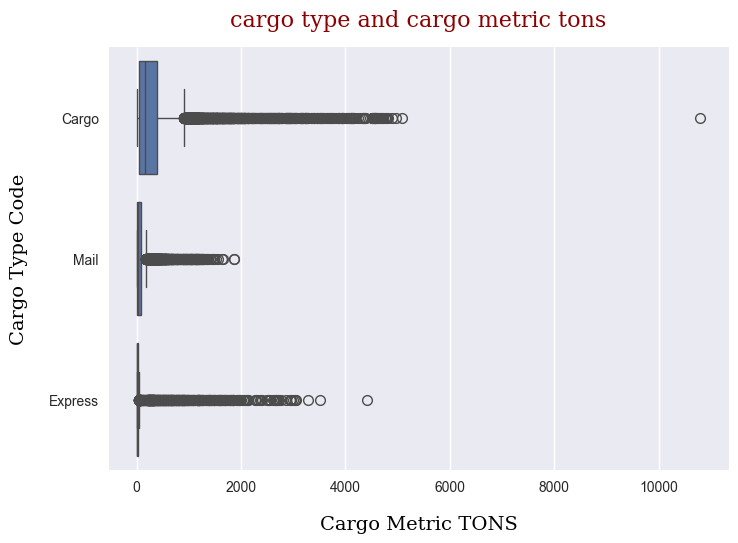

In [22]:
# What is the relationship between cargo type and cargo metric tons?
df["Cargo Type Code"].value_counts()
sns.boxplot(data= df , y = "Cargo Type Code" , x = "Cargo Metric TONS")
plt.title("cargo type and cargo metric tons" , fontdict= titlefont , pad = 15)
plt.ylabel("Cargo Type Code" , fontdict= lablefont , labelpad= 15)
plt.xlabel("Cargo Metric TONS" , fontdict= lablefont , labelpad= 15)

In [29]:
# Do different airlines specialize in certain types of cargo?
df.groupby("Operating Airline")['Cargo Type Code']

Text(0.5, 0, 'Cargo Type')

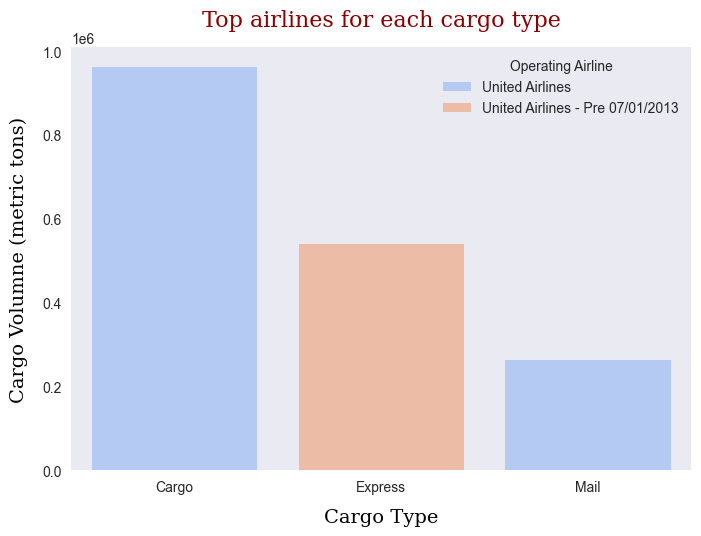

In [62]:
#What are the top airlines for each cargo type?

df_grouped = df.groupby(['Cargo Type Code', "Operating Airline"])['Cargo Metric TONS'].sum().reset_index()
top_airline_each_cargo = df_grouped.loc[df_grouped.groupby("Cargo Type Code")['Cargo Metric TONS'].idxmax()]
sns.barplot(data = top_airline_each_cargo , x ='Cargo Type Code', y = "Cargo Metric TONS", hue = "Operating Airline" , palette= "coolwarm")
plt.grid(False)
plt.title("Top airlines for each cargo type", fontdict= titlefont , pad= 15)
plt.ylabel("Cargo Volumne (metric tons)" , fontdict= lablefont , labelpad=10)
plt.xlabel("Cargo Type", fontdict= lablefont , labelpad=10)

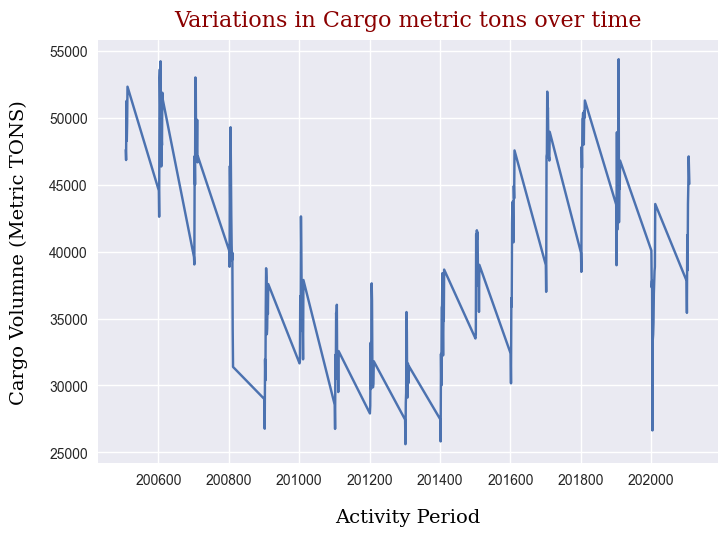

In [81]:
# What is the trend of cargo metric tons over time?
df["Cargo Aircraft Type"].value_counts()
df.groupby("Activity Period")["Cargo Metric TONS"].sum()
sns.lineplot(df.groupby("Activity Period")["Cargo Metric TONS"].sum()
)
plt.title("Variations in Cargo metric tons over time" , fontdict= titlefont ,pad = 10)
plt.xlabel("Activity Period" , labelpad=15 , fontdict= lablefont)
plt.ylabel("Cargo Volumne (Metric TONS)" , labelpad=15 , fontdict= lablefont)
plt.show()

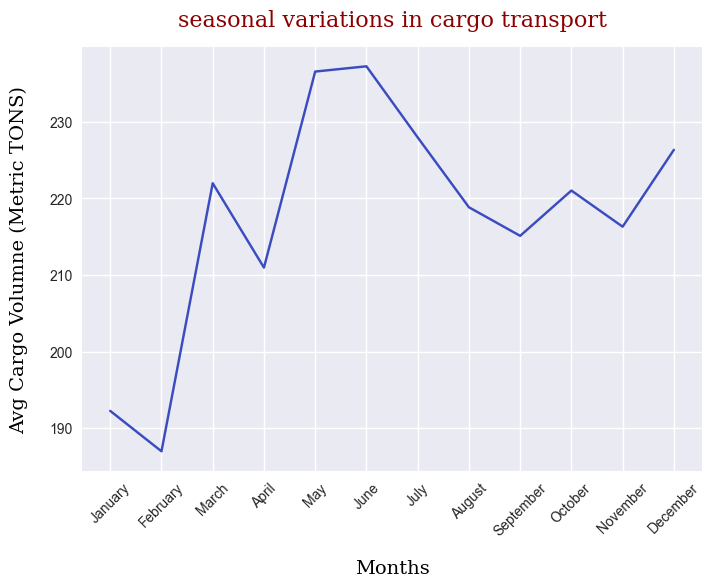

In [ ]:
# Are there seasonal variations in cargo transport?
def extract_month(year):
    return year%100
    
df['month'] = df['Activity Period'].apply(extract_month)
df.groupby("month")['Cargo Metric TONS'].mean().plot(kind= "line", colormap="coolwarm")
plt.title("seasonal variations in cargo transport" , fontdict= titlefont , pad = 15)
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           labels=["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"], rotation = 45)

plt.xlabel("Months" , labelpad=15 , fontdict= lablefont)
plt.ylabel("Avg Cargo Volumne (Metric TONS)" , labelpad=15 , fontdict= lablefont)
plt.show()

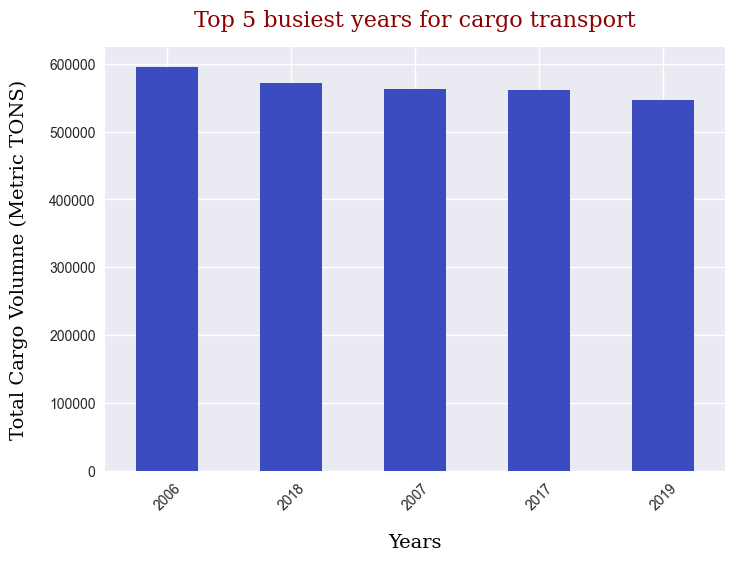

In [ ]:
# What are the top 5 busiest months/years for cargo transport?
def extract_year(date):
    return date // 100
    
df.groupby("year")['Cargo Metric TONS'].sum().sort_values(ascending= False)[:5].plot(kind= "bar", colormap="coolwarm")
plt.title("Top 5 busiest years for cargo transport" , fontdict= titlefont , pad = 15)
plt.xticks(rotation = 45)

plt.xlabel("Years" , labelpad=15 , fontdict= lablefont)
plt.ylabel("Total Cargo Volumne (Metric TONS)" , labelpad=15 , fontdict= lablefont)
plt.show()

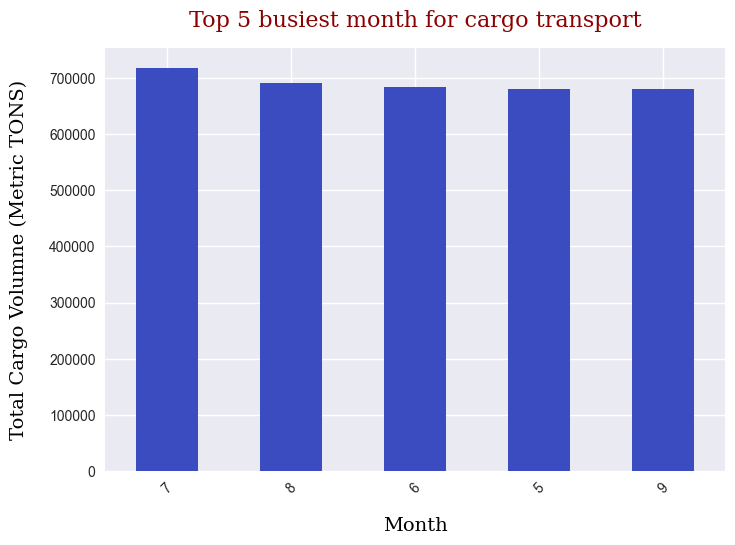

In [118]:
# What are the top 5 busiest months for cargo transport?
df.groupby("month")['Cargo Metric TONS'].sum().sort_values(ascending= False)[:5].plot(kind= "bar", colormap="coolwarm")
plt.title("Top 5 busiest month for cargo transport" , fontdict= titlefont , pad = 15)
plt.xticks(rotation = 45)

plt.xlabel("Month" , labelpad=15 , fontdict= lablefont)
plt.ylabel("Total Cargo Volumne (Metric TONS)" , labelpad=15 , fontdict= lablefont)
plt.show()